In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline

import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 140

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
for i in df.columns:
  null_rate = df[i].isna().sum() / len(df) * 100
  if null_rate > 0:
    print(f'{i} null rate: {round(null_rate, 2)}%')

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


# Dealing with the missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace = True)
df['director'].replace(np.nan, 'No Data', inplace = True)

df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020


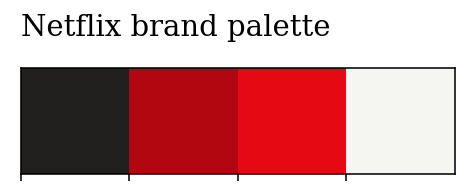

In [ ]:
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])
plt.title('Netflix brand palette', loc = 'left', fontfamily = 'serif', fontsize = 15, y = 1.2)
plt.show()

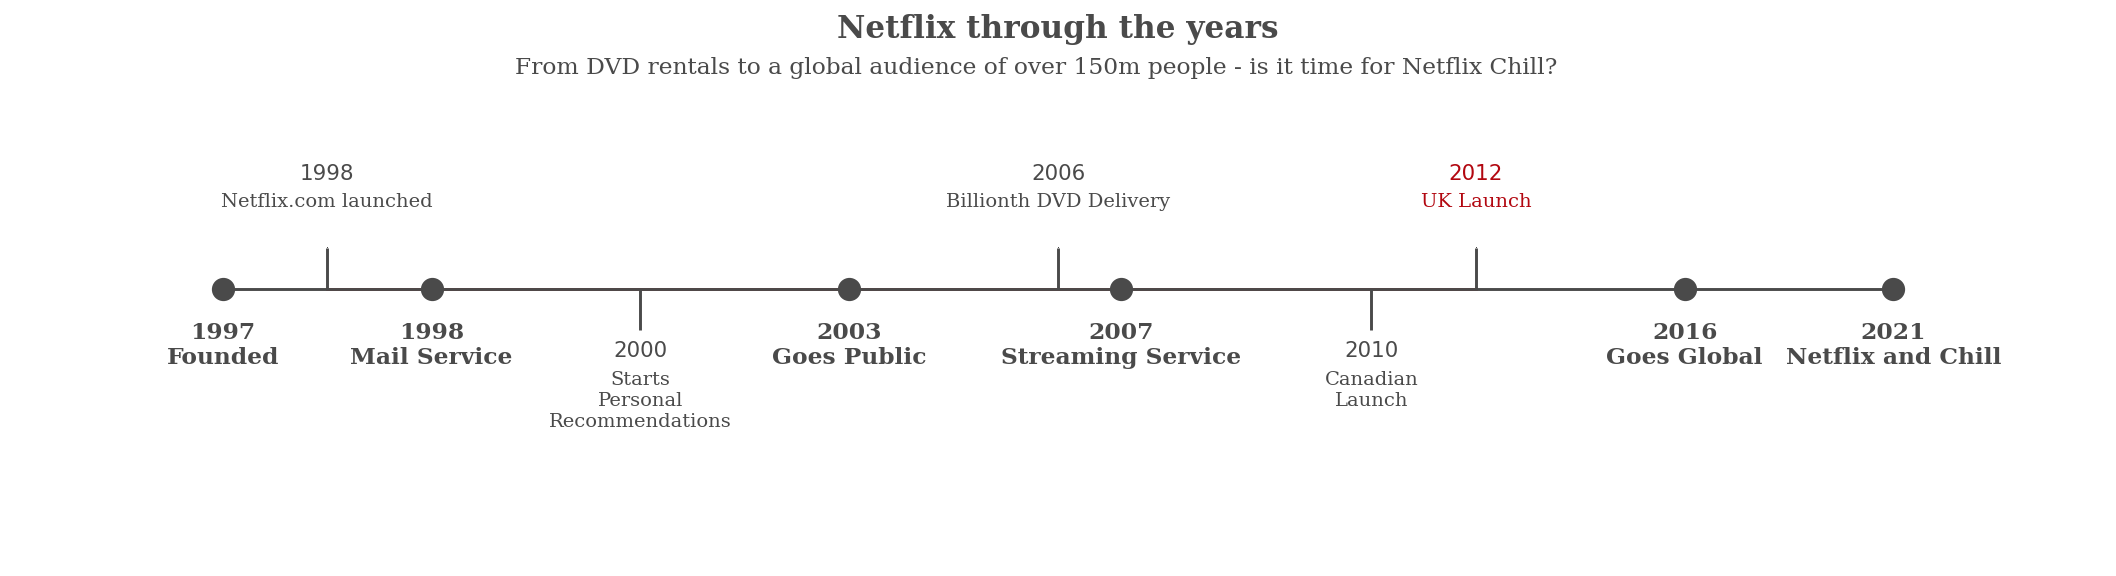

In [ ]:
from datetime import datetime

tl_dates = [
            '1997\nFounded',
            '1998\nMail Service',
            '2003\nGoes Public',
            '2007\nStreaming Service',
            '2016\nGoes Global',
            '2021\nNetflix and Chill'
]

tl_x = [1, 2, 4, 5.3, 8, 9]
tl_sub_x = [1.5, 3, 5, 6.5, 7]

tl_sub_times = ['1998', '2000', '2006', '2010', '2012']

tl_text = [
    'Netflix.com launched',
    'Starts\nPersonal\nRecommendations', 'Billionth DVD Delivery',
    'Canadian\nLaunch', 'UK Launch'
]

fig, ax = plt.subplots(figsize = (15, 4), constrained_layout = True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

ax.axhline(0, xmin = 0.1, xmax = 0.9, c = '#4a4a4a', zorder = 1)

ax.scatter(tl_x, np.zeros(len(tl_x)), s = 120, c = '#4a4a4a', zorder = 2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 30, c = '#4a4a4a', zorder = 3)

for x, date in zip(tl_x, tl_dates):
  ax.text(x, -0.55, date, ha = 'center', fontfamily = 'serif', fontweight = 'bold',
          color = '#4a4a4a', fontsize = 12)

levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)
plt.setp(baseline, zorder = 0)
plt.setp(markerline, marker = ',', color = '#4a4a4a')
plt.setp(stemline, color = '#4a4a4a')

for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
  ax.text(x, 1.3 * (idx % 2)-0.5, time, ha='center',
          color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)

  ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')

for spine in ['left', 'top', 'right', 'bottom']:
  ax.spines[spine].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Netflix through the years', fontweight = 'bold', fontfamily = 'serif', fontsize = 16, color = '#4a4a4a')
ax.text(2.4, 1.57, 'From DVD rentals to a global audience of over 150m people - is it time for Netflix Chill?',
        fontfamily = 'serif', fontsize = 12, color = '#4a4a4a')

plt.show()

In [ ]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x / y)).round(2)

mf_ratio = pd.DataFrame(r).T

In [ ]:
mf_ratio

type,Movie,TV Show
type,0.69,0.31


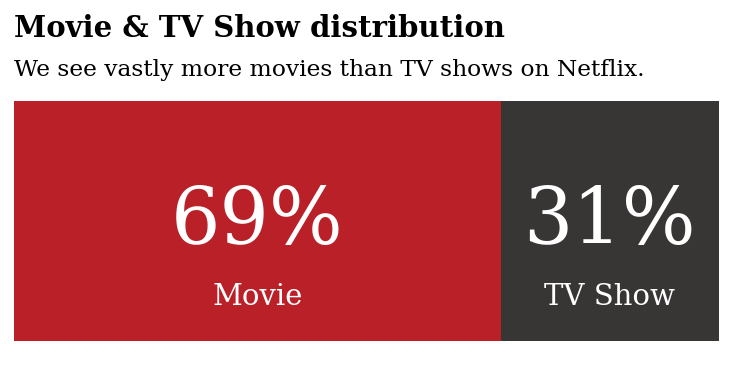

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#b20710', alpha = 0.9, label = 'Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left = mf_ratio['Movie'],
        color = '#221f1f', alpha = 0.9, label = 'Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%",
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie",
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show",
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

# By Country

In [ ]:
df['count'] = 1

df['first_country'] = df['country'].apply(lambda x: x.split(',')[0])
df['first_country'].head()

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
print(df['target_ages'].unique())

df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',')
                                               .replace(', ', ',').split(','))

df['first_country'].replace('United States', 'USA', inplace = True)
df['first_country'].replace('United Kingdom', 'UK', inplace = True)
df['first_country'].replace('South Korea', 'S. Korea', inplace = True)

NameError: ignored

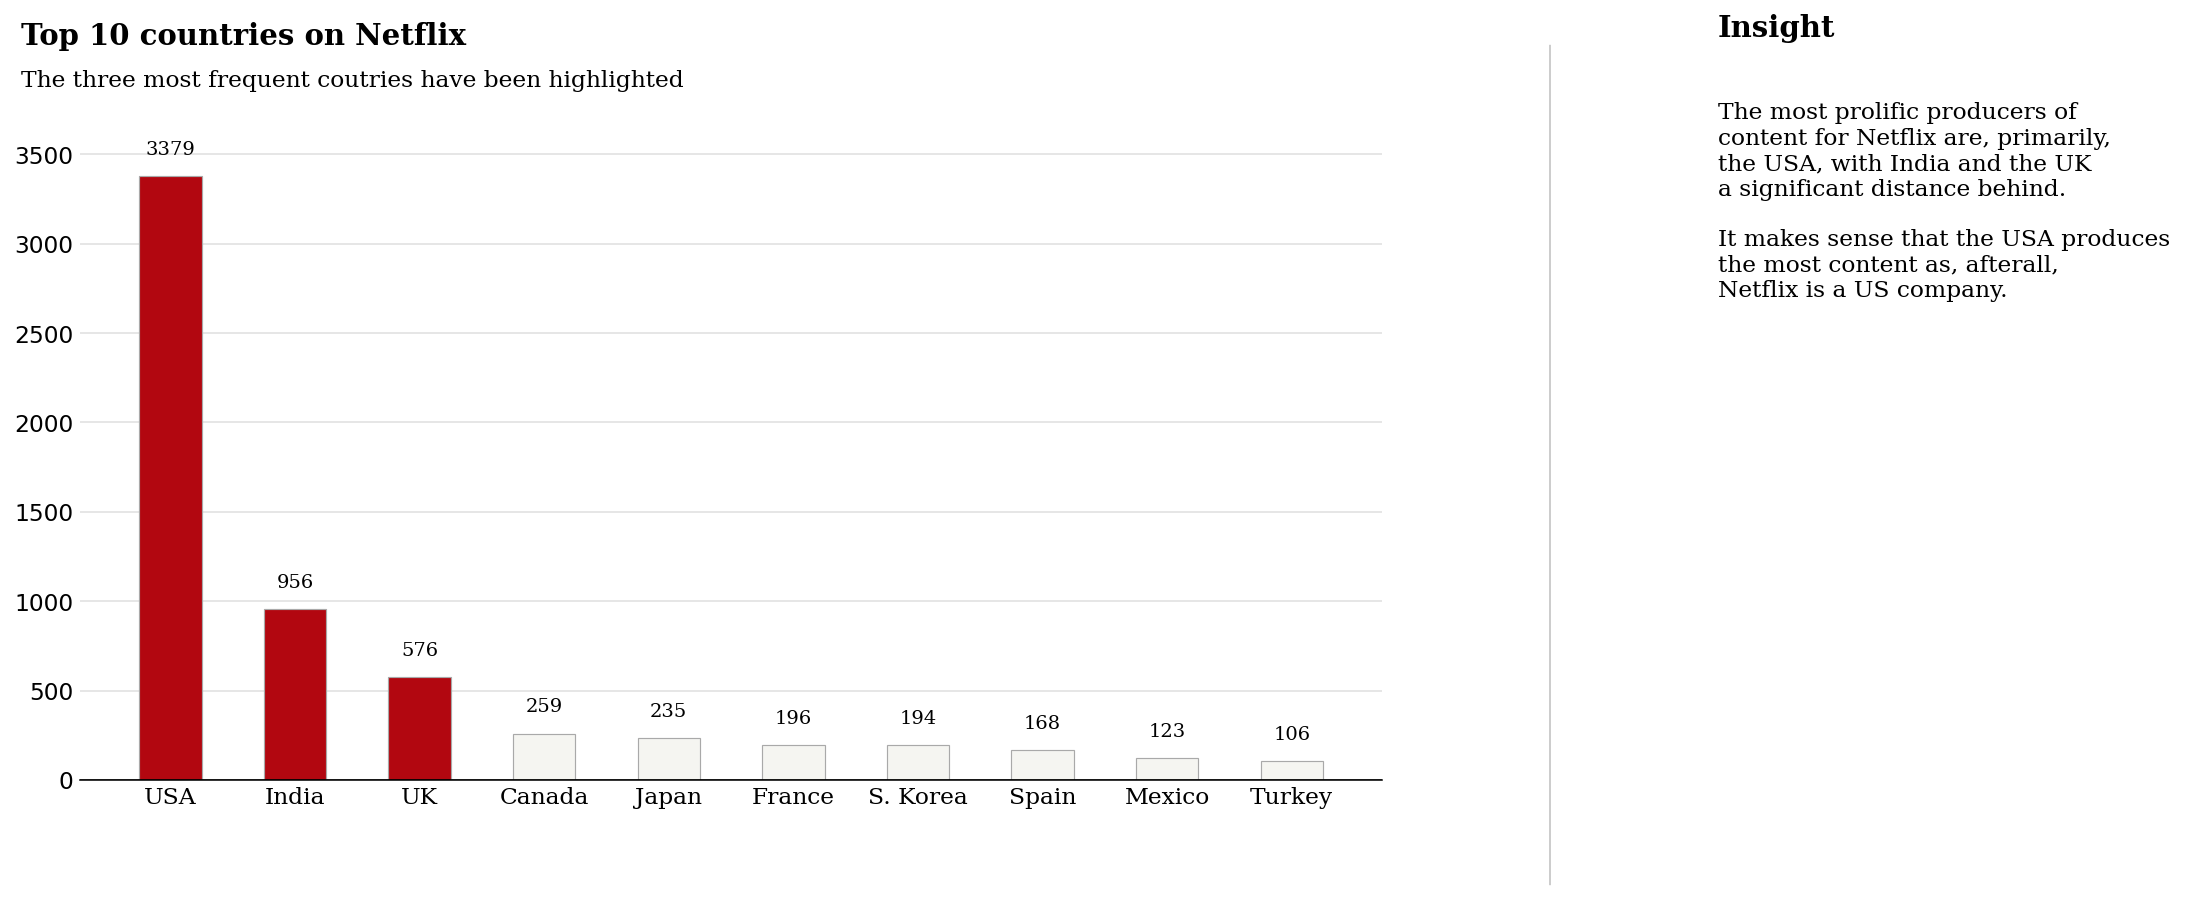

In [ ]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending = False)[:10]

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#b20710'

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(data.index, data, width = 0.5, edgecolor = 'darkgrey', linewidth = 0.6, color = color_map)

for i in data.index:
  ax.annotate(f'{data[i]}',
              xy = (i, data[i] + 150),
              va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data.index, fontfamily = 'serif', rotation = 0)

fig.text(0.09, 1, 'Top 10 countries on Netflix',
                  fontsize = 15,
                  fontweight = 'bold',
                  fontfamily = 'serif')

fig.text(0.09, 0.95, 'The three most frequent coutries have been highlighted',
                  fontsize = 12,
                  fontweight = 'light',
                  fontfamily = 'serif')

fig.text(1.1, 1.01, 'Insight',
                  fontsize = 15,
                  fontweight = 'bold',
                  fontfamily = 'serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces
the most content as, afterall,
Netflix is a US company.
''',
                  fontsize = 12,
                  fontweight = 'light',
                  fontfamily = 'serif')

ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = 0.7)

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

l1 = lines.Line2D([1, 1], [0, 1], transform = fig.transFigure, figure = fig, color = 'black', lw = 0.2)
fig.lines.extend([l1])

ax.tick_params(axis = u'both', which = u'both', length = 0)

plt.show()
